In [1]:
import torch
from dataset.mydataset import MyDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Use the line below to show inline in a notebook
%matplotlib inline

/home/mai.kassem/.conda/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
isic_train = "/l/users/salwa.khatib/proco/ISIC2018_Task3_Training_Input"
isic_txt_train = f"/l/users/salwa.khatib/proco/ISIC2018_Task3_Training_Input/ISIC2018_Task3_Training_GroundTruth.txt"
isic_num_classes = 7

aptos_train = "/l/users/salwa.khatib/aptos/train_images"
aptos_txt_train = f"/l/users/salwa.khatib/aptos/train.txt"
aptos_num_classes = 5

workers = 8
batch_size = 32

In [3]:
isic_train_dataset = MyDataset(
    root=isic_train,
    txt=isic_txt_train,
    transform="sim-sim",
    num_classes=isic_num_classes,
)
aptos_train_dataset = MyDataset(
    root=aptos_train,
    txt=aptos_txt_train,
    transform="sim-sim",
    num_classes=aptos_num_classes,
)
# train_loader = torch.utils.data.DataLoader(
#     train_dataset, batch_size=32, num_workers=args.workers, pin_memory=True
# )

{1: 6705, 0: 1113, 4: 1099, 2: 514, 3: 327, 6: 142, 5: 115}


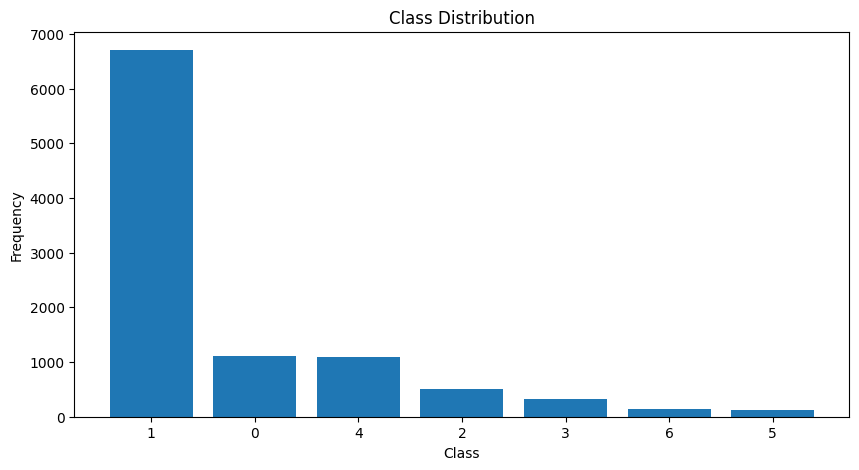

In [4]:
unique, counts = np.unique(isic_train_dataset.labels, return_counts=True)
# create dictionary of class:count
hist = dict(zip(unique, counts))
# order by counts
hist = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)}
print(hist)
labels = map(str, hist.keys())
plt.figure(figsize=(10, 5))
plt.bar(
    list(labels),
    hist.values(),
)

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.savefig("isic_class_distribution.pdf")
plt.show()


{0: 1259, 2: 699, 1: 269, 4: 200, 3: 136}


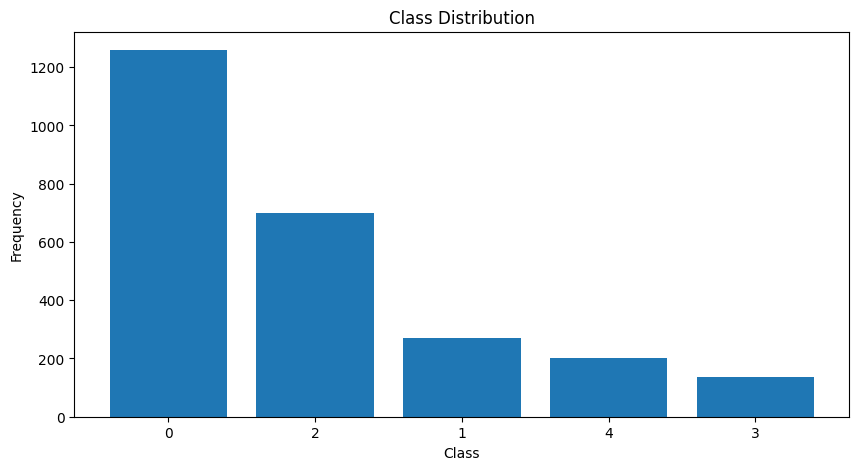

In [5]:
unique, counts = np.unique(aptos_train_dataset.labels, return_counts=True)
# create dictionary of class:count
hist = dict(zip(unique, counts))
# order by counts
hist = {k: v for k, v in sorted(hist.items(), key=lambda item: item[1], reverse=True)}
print(hist)
labels = map(str, hist.keys())
plt.figure(figsize=(10, 5))
plt.bar(
    list(labels),
    hist.values(),
)

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.savefig("aptos_class_distribution.pdf")
plt.show()
